# Feature Scaling Models Analysis

1. Fetch pre-processed data
2. Feature Scaling
3. Train Model
4. Compare Basic Models Performance

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling 

#sklearn Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline

# Libraries for ploting charts
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib notebook
%matplotlib inline

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

**1. Fetch the pre-processed data**

In [3]:
data = pd.DataFrame()

data = pd.read_csv('../datasets/data-preprocessed.csv', low_memory=False)

In [4]:
x = data.iloc[:,:len(data.columns)-1]
y = data['total']
x

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
1,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
2,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
3,0.000000,0.000876,0.000000,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
4,0.000000,0.000876,0.000000,0.066667,0.034483,0.001342,0.000947,0.222222,0.111111,0.166667,0.003448,0.006479,0.166667,0.1,0.166667,0.007353,0.000000,0.003636,0.090909,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43042,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,0.411494,0.838013,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818
43043,0.998943,0.000876,0.003891,0.200000,0.034483,0.077181,0.002841,0.111111,0.111111,0.333333,1.000000,0.196544,0.166667,0.2,0.333333,0.161765,0.304167,0.000000,0.136364,0.181818
43044,0.998943,0.000876,0.003891,0.200000,0.034483,0.414765,0.720644,0.111111,0.111111,0.333333,0.405747,0.663067,0.166667,0.2,0.333333,0.514706,0.504167,0.000000,0.136364,0.181818
43045,1.000000,0.000876,0.003891,0.200000,0.034483,0.414765,0.558712,0.111111,0.111111,0.333333,0.411494,0.313175,0.166667,0.2,0.333333,0.558824,0.758333,0.000000,0.136364,0.181818


**2. Feature Scaling**

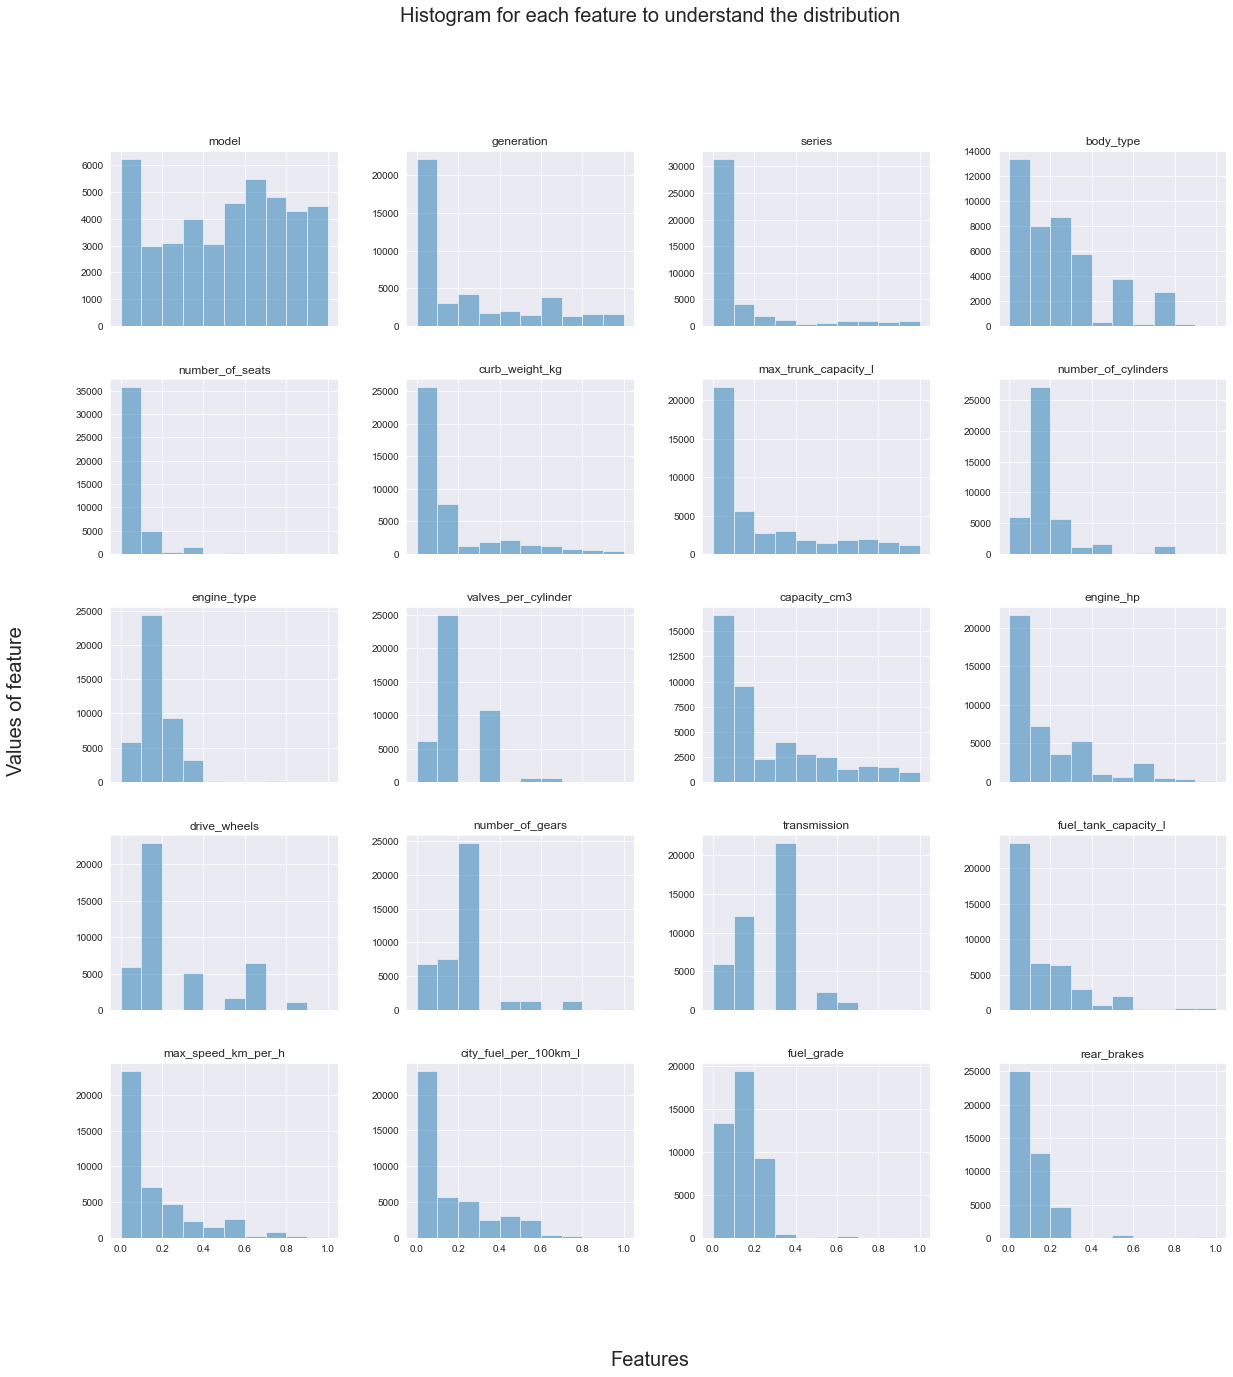

In [5]:
# set up figure & axes
sb.set_style("dark")
fig, axes = plt.subplots(nrows=5, ncols=4, sharex=True, sharey=False, figsize = (20,20))
# set title and axis labels
fig.suptitle('Histogram for each feature to understand the distribution', fontsize=20)
# Set common labels
fig.text(0.5, 0.04, 'Features', ha='center', va='center', fontsize=20)
fig.text(0.06, 0.5, 'Values of feature ', ha='center', va='center', rotation='vertical', fontsize=20)

# Plotting the histograms of each variable
x.hist(alpha=0.5, ax=axes)
plt.show()

**3. Train Model**

In [6]:
# standard scaler
columns = x.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
X_std = pd.DataFrame(X_std, columns = columns)

x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.15, random_state = 45)

lr_std = LinearRegression()
lr_std.fit(x_train, y_train)
y_pred = lr_std.predict(x_test)
print('Accuracy of linear regression on test set with standardized features: {:.2f}'.format(lr_std.score(x_test, y_test)))

X_std.head()

Accuracy of linear regression on test set with standardized features: 0.92


,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.950450,-0.916182,-0.45353,-0.673058,-0.618702,-0.853188,-0.771596,-0.798583,-0.903041,-0.409875
1,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.950450,-0.916182,-0.45353,-0.035066,0.504070,-0.853188,-0.750229,-0.779333,-0.903041,-0.409875
2,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.946013,-0.905410,-0.45353,-0.673058,-0.618702,-0.853188,-0.771596,-0.798583,-0.903041,-0.409875
3,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.735018,-0.796007,-0.271018,-0.303754,-0.241637,-0.946013,-0.905410,-0.45353,-0.035066,0.504070,-0.853188,-0.750229,-0.779333,-0.903041,-0.409875
4,-1.736461,-0.81269,-0.558153,-0.719304,-0.295201,-0.731931,-0.796007,0.475496,-0.303754,-0.241637,-0.941576,-0.894638,-0.45353,-0.673058,-0.618702,-0.853188,-0.792963,-0.798583,-0.421997,-0.409875


In [7]:
# standard scaler
norm = MinMaxScaler()
X_norm = norm.fit_transform(x)
X_norm = pd.DataFrame(X_norm, columns = columns)

x1_train, x1_test, y1_train, y1_test = train_test_split(X_norm, y, test_size = 0.15, random_state = 45)

lr_norm = LinearRegression()
lr_norm.fit(x1_train, y1_train)
y_pred = lr_norm.predict(x1_test)
print('Accuracy of linear regression on test set with Normalized features: {:.2f}'.format(lr_norm.score(x1_test, y1_test)))

X_norm.head()

Accuracy of linear regression on test set with Normalized features: 0.92


,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
0,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
1,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.001149,0.002160,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
2,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.1,0.166667,0.007353,0.004167,0.003636,0.045455,0.090909
3,0.0,0.000876,0.0,0.066667,0.034483,0.000671,0.000947,0.111111,0.111111,0.166667,0.002299,0.004320,0.166667,0.2,0.333333,0.007353,0.008333,0.007273,0.045455,0.090909
4,0.0,0.000876,0.0,0.066667,0.034483,0.001342,0.000947,0.222222,0.111111,0.166667,0.003448,0.006479,0.166667,0.1,0.166667,0.007353,0.000000,0.003636,0.090909,0.090909


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [9]:
y_train.head()

30028    0.740050
2690     0.054726
40494    0.951493
536      0.032338
21021    0.552239
Name: total, dtype: float64

In [10]:
x_test.head()

,model,generation,series,body_type,number_of_seats,curb_weight_kg,max_trunk_capacity_l,number_of_cylinders,engine_type,valves_per_cylinder,capacity_cm3,engine_hp,drive_wheels,number_of_gears,transmission,fuel_tank_capacity_l,max_speed_km_per_h,city_fuel_per_100km_l,fuel_grade,rear_brakes
35716,0.840381,0.848511,0.070039,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4819,0.096195,0.156743,0.000000,0.066667,0.103448,0.161074,0.083333,0.222222,0.111111,0.166667,0.150575,0.345572,0.666667,0.3,0.333333,0.044118,0.079167,0.021818,0.181818,0.272727
7337,0.146934,0.253065,0.003891,0.200000,0.034483,0.075168,0.081439,0.111111,0.111111,0.333333,0.281609,0.643629,0.166667,0.2,0.333333,0.522059,0.500000,0.054545,0.045455,0.181818
37742,0.884778,0.001751,0.002594,0.000000,0.034483,0.151678,0.837121,0.111111,0.222222,0.166667,0.274713,0.043197,0.166667,0.2,0.500000,0.272059,0.058333,0.000000,0.227273,0.181818
27286,0.656448,0.007005,0.045396,0.066667,0.103448,0.000000,0.626894,0.222222,0.111111,0.333333,0.803448,0.861771,0.666667,0.1,0.166667,0.448529,0.000000,0.000000,0.045455,0.181818


**4. Compare Feature Scaled Models Performance**

In [11]:
# Function for evaluating model performance
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),20)
    Testing_Score = np.round(model.score(x_test,y_test),20)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),20)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),20)
    
    rmse_training = np.round(mean_squared_error(y_train,y_train_pred, squared=False),20)
    rmse_testing = np.round(mean_squared_error(y_test,y_test_pred, squared=False),20)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),20)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),20)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),20)
    r2_testing = np.round(r2_score(y_test,y_test_pred),20)
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data MSE:",mse_training)
    print("Testing Data MSE:",mse_testing)
    print("")
    
    print("Training Data RMSE:",rmse_training)
    print("Testing Data RMSE:",rmse_testing)
    print("")
    
    print("Training Data MAE:",mae_training)
    print("Testing Data MAE:",mae_testing)
    print("")
    
    print("Training Data R2:",r2_training)
    print("Testing Data R2:",r2_testing)
    print("")
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions', alpha=0.5)
    plt.legend(loc="upper left")
    plt.title("Training Predictions v/s Testing Predictions")
    plt.show()
    
    
    plt.figure(figsize = (20,5))
    plt.scatter(x=y_train, y=y_train_pred, c="#6495ED", alpha=0.3)
    z = np.polyfit(y_train, y_train_pred, 1)
    p = np.poly1d(z)
    plt.plot(y_train,p(y_train),"#DC143C")
    plt.ylabel('Predicted Sales')
    plt.xlabel('Real Sales')
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

In [12]:
#selective features for Standardization and Normalization
#different pipelines for Gaussian and Non-Gaussian features
from sklearn.compose import ColumnTransformer
Standardize_Var = ['model']

Normalize_Var = ['generation','series','body_type','number_of_seats','curb_weight_kg',	
                 'max_trunk_capacity_l','number_of_cylinders','engine_type',
                 'valves_per_cylinder','capacity_cm3','engine_hp','drive_wheels',
                 'number_of_gears','transmission','fuel_tank_capacity_l','max_speed_km_per_h',
                 'city_fuel_per_100km_l','fuel_grade','rear_brakes']

ct = ColumnTransformer([('scaler', StandardScaler(), Standardize_Var),
                                                ('minmax', MinMaxScaler(), Normalize_Var)])
x_train = ct.fit_transform(x_train)

# 1. Linear Regresssion

Model Performance for: LinearRegression()

Training Score: 0.2452969482926448
Testing Score: 0.24051589307357388

Training Data MSE: 0.06548555348839528
Testing Data MSE: 0.06657024862865919

Training Data RMSE: 0.255901452689107
Testing Data RMSE: 0.25801210946127934

Training Data MAE: 0.20887900326129177
Testing Data MAE: 0.21106333715546652

Training Data R2: 0.2452969482926448
Testing Data R2: 0.24051589307357388

Residual Analysis:


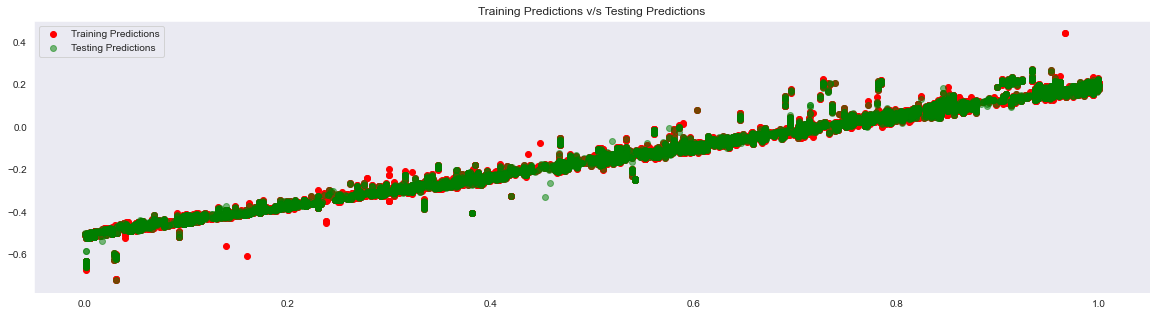

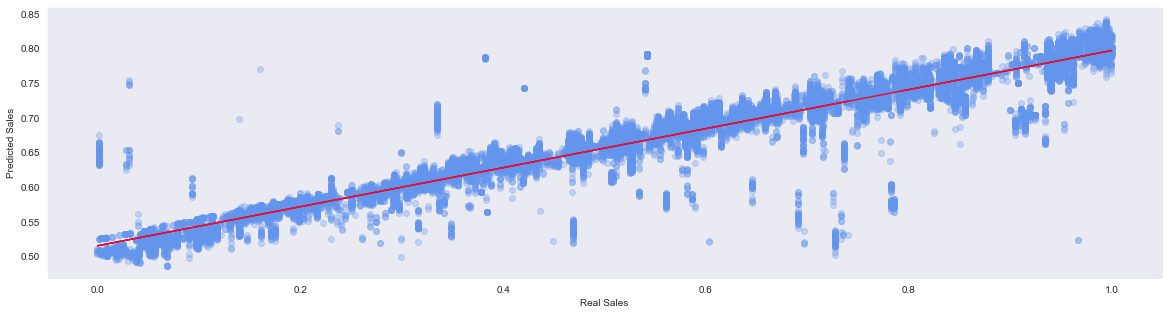

In [13]:
model = LinearRegression()
model.fit(x_train,y_train)
LR_performance = model_performance(model,model_name = model)

# 2. Ridge Regression

In [14]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Ridge(),param_grid = param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0.30944998, 0.64005571, 0.84454699, 0.35129181, 0.43114724,
       0.56723627, 0.63819037, 0.92625248, 0.27017698, 0.15302743,
       0.72433582, 0.24071594, 0.20642029, 0.93251353, 0.31224516,
       0.34844457, 0.76957968, 0.6133661 , 0.85830912, 0.89160552,
       0.06231846, 0.62111481, 0.14194728, 0.7478275 , 0.80123184,
       0.92480742, 0.1...
       0.67026078, 0.73641315, 0.74566778, 0.56542711, 0.96393019,
       0.62644823, 0.14700154, 0.39894631, 0.2817946 , 0.05896419,
       0.13431304, 0.84760688, 0.74732766, 0.13387392, 0.43386384,
       0.21114793, 0.87892907, 0.65062702, 0.30676391, 0.83695493,
       0.45345765, 0.25438227, 0.38031881, 0.69028079, 0.79461957,
       0.45498118, 0.48301408, 0.54771077, 0.4701061 , 0.4775583 ,
       0.71714793, 0.03024165, 0.54998138, 0.95275184, 0.29942228])})

Model Performance for: Ridge(alpha=0.03024164611483937)

Training Score: 0.24529687696297242
Testing Score: 0.24051584852519026

Training Data MSE: 0.06548555967766809
Testing Data MSE: 0.06657025253341105

Training Data RMSE: 0.25590146478218545
Testing Data RMSE: 0.25801211702827265

Training Data MAE: 0.20887905153117298
Testing Data MAE: 0.21106338255494045

Training Data R2: 0.24529687696297242
Testing Data R2: 0.24051584852519026

Residual Analysis:


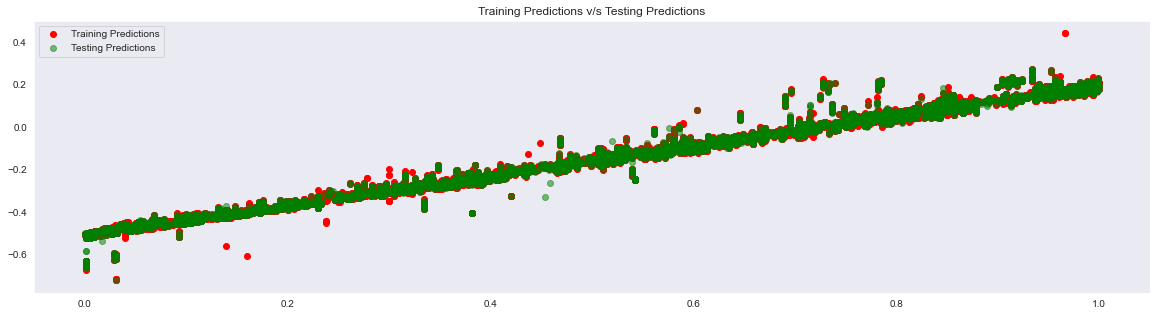

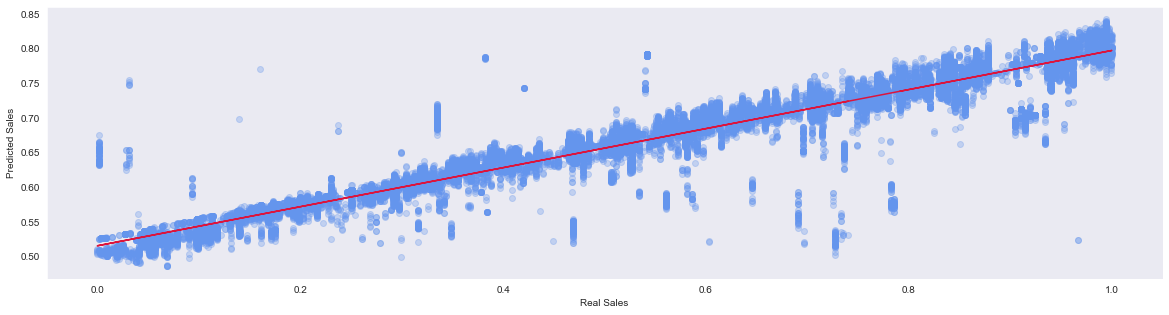

In [15]:
model2 = grid.best_estimator_
model2.fit(x_train,y_train)
Ridge_performance = model_performance(model2,model_name = model2)

# 3. Lasso

In [16]:
param_grid = {'alpha':np.random.rand(100)}
grid = GridSearchCV(Lasso(),param_grid = param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.21089432, 0.81871092, 0.68275015, 0.13463239, 0.53118842,
       0.53176245, 0.15253577, 0.37209233, 0.26708044, 0.25498734,
       0.25631955, 0.62217372, 0.83098353, 0.83659301, 0.84931805,
       0.37962709, 0.17972942, 0.90745947, 0.78603959, 0.23424845,
       0.99296374, 0.88732975, 0.92894066, 0.70558117, 0.81643072,
       0.67728738, 0...
       0.95518563, 0.96814326, 0.74737316, 0.33028506, 0.62212516,
       0.73443055, 0.72065477, 0.12582144, 0.7739134 , 0.02430708,
       0.41615034, 0.13149067, 0.62062062, 0.00421185, 0.990556  ,
       0.29238177, 0.60730687, 0.08556894, 0.40580204, 0.37797054,
       0.87484417, 0.26136158, 0.56291111, 0.26981614, 0.41838315,
       0.79501671, 0.53428295, 0.84586028, 0.50782889, 0.46972532,
       0.95446931, 0.94711556, 0.00461521, 0.21293595, 0.34803586])})

Model Performance for: Lasso(alpha=0.0042118533354311705)

Training Score: 0.22244240697150242
Testing Score: 0.21735513175029386

Training Data MSE: 0.06746864112101128
Testing Data MSE: 0.06860033408490318

Training Data RMSE: 0.25974726393363856
Testing Data RMSE: 0.26191665484444315

Training Data MAE: 0.2112694086487874
Testing Data MAE: 0.21347249894765266

Training Data R2: 0.22244240697150242
Testing Data R2: 0.21735513175029386

Residual Analysis:


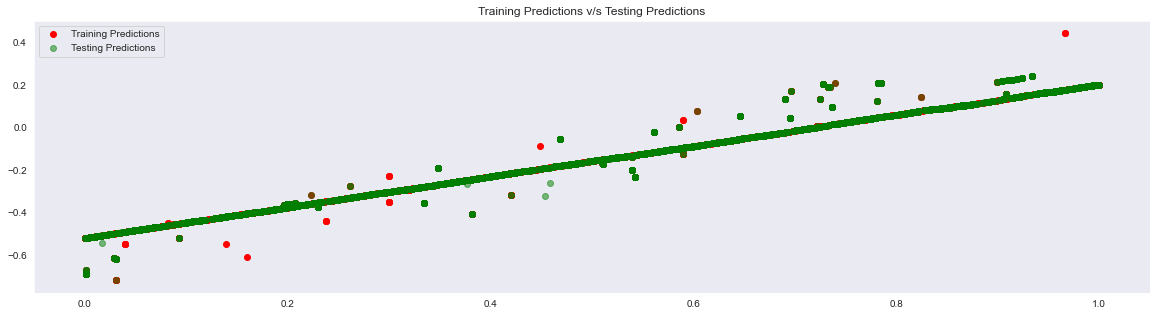

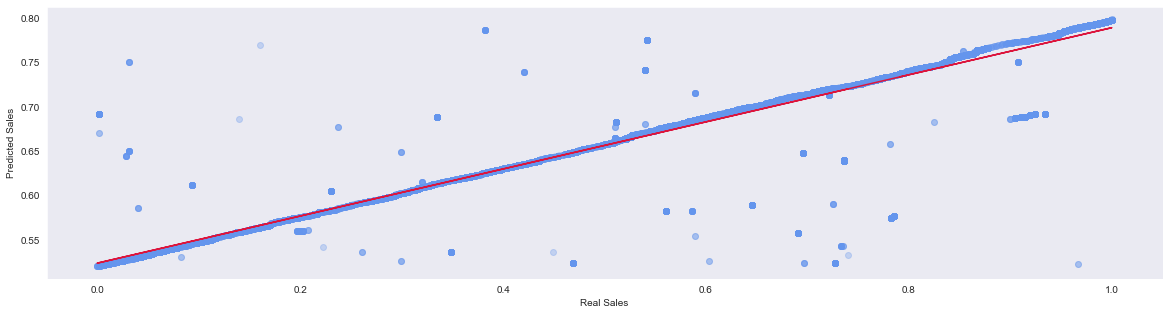

In [17]:
model3 = grid.best_estimator_
model3.fit(x_train,y_train)
Lasso_performance = model_performance(model3,model_name = model3)

# 4. RandomForest Regressor

In [18]:
param_grid = {'max_depth':np.arange(1,5),'min_samples_split':np.arange(2,5),'min_samples_leaf':np.arange(1,5)}
grid = GridSearchCV(RandomForestRegressor(),param_grid = param_grid,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4])})

Model Performance for: RandomForestRegressor(max_depth=2, min_samples_leaf=2)

Training Score: 0.1905581656996651
Testing Score: 0.18251886439181586

Training Data MSE: 0.07023523545572379
Testing Data MSE: 0.07165380019196022

Training Data RMSE: 0.2650193114769635
Testing Data RMSE: 0.26768227470633954

Training Data MAE: 0.19556624578426934
Testing Data MAE: 0.19842387511563642

Training Data R2: 0.1905581656996651
Testing Data R2: 0.18251886439181586

Residual Analysis:


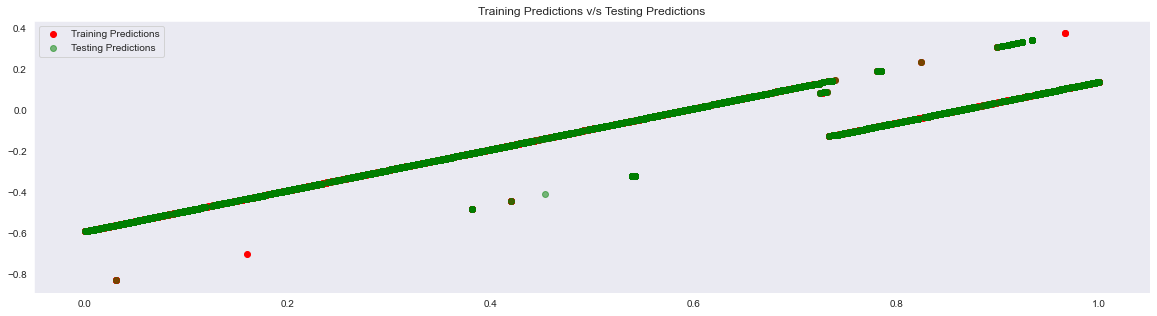

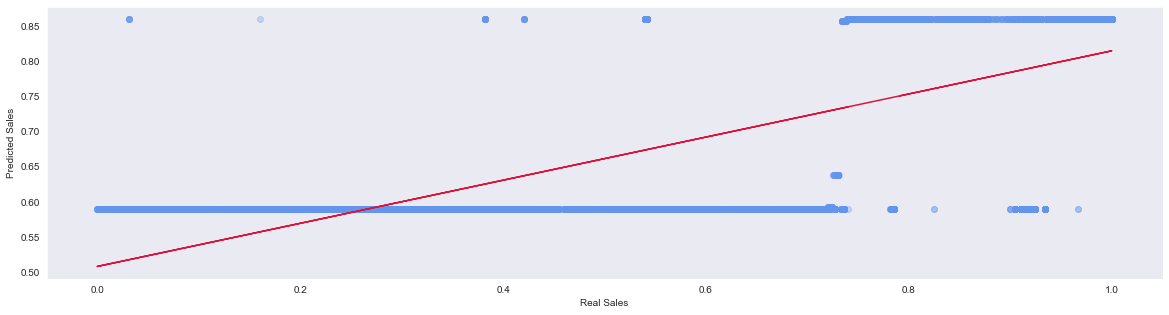

In [19]:
model5 = grid.best_estimator_
model5.fit(x_train,y_train)
RF_performance = model_performance(model5,model_name = model5)

# Model Performances

In [20]:
eval_performance = [["Linear Regression",LR_performance[0],LR_performance[1],LR_performance[2],LR_performance[3],LR_performance[4],LR_performance[5],LR_performance[6],LR_performance[7]],
                     ["Ridge",Ridge_performance[0],Ridge_performance[1],Ridge_performance[2],Ridge_performance[3],Ridge_performance[4],Ridge_performance[5],Ridge_performance[6],Ridge_performance[7]],
                     ["Lasso",Lasso_performance[0],Lasso_performance[1],Lasso_performance[2],Lasso_performance[3],Lasso_performance[4],Lasso_performance[5],Lasso_performance[6],Lasso_performance[7]],
                     ["Random Forest",RF_performance[0],RF_performance[1],RF_performance[2],RF_performance[3],RF_performance[4],RF_performance[5],RF_performance[6],RF_performance[7]],
                     ]

In [21]:
performance = pd.DataFrame(eval_performance,columns = ['Models',"Train Score","Test Score","Train MSE",'Test MSE','Train MAE',"Test MAE",'Train R2',"Test R2"])

In [22]:
performance

,Models,Train Score,Test Score,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,Linear Regression,0.245297,0.240516,0.065486,0.066570,0.208879,0.211063,0.245297,0.240516
1,Ridge,0.245297,0.240516,0.065486,0.066570,0.208879,0.211063,0.245297,0.240516
2,Lasso,0.222442,0.217355,0.067469,0.068600,0.211269,0.213472,0.222442,0.217355
3,Random Forest,0.190558,0.182519,0.070235,0.071654,0.195566,0.198424,0.190558,0.182519


<AxesSubplot:title={'center':'Training R2 v/s Testing R2'}, xlabel='Models', ylabel='R-Squared Score'>

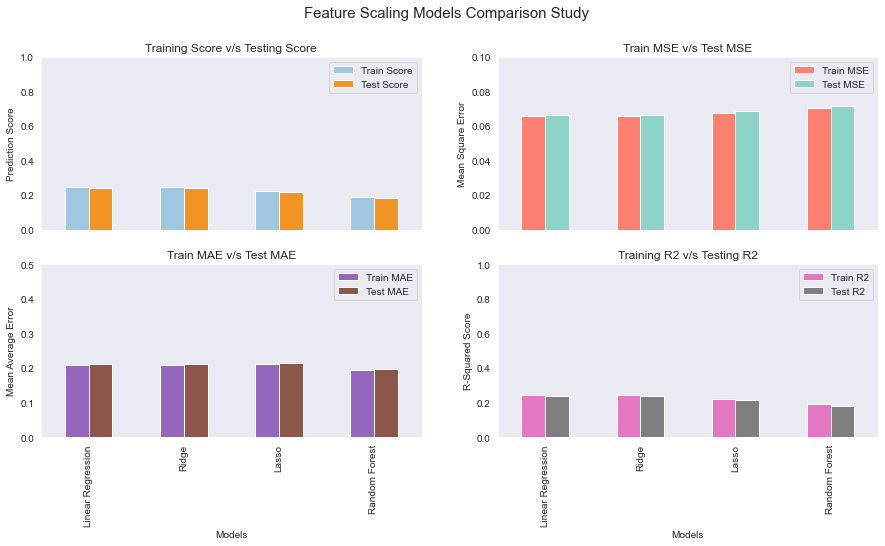

In [23]:
# Comparison Plot

sb.set_style("dark")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True)
fig.suptitle('Feature Scaling Models Comparison Study', fontsize=15)

performance[["Models","Train Score", "Test Score"]].plot(ax=ax1, x="Models", ylabel="Prediction Score", kind="bar", 
                                                         title="Training Score v/s Testing Score", color=['#A1C7E0', "#F29325"], 
                                                         figsize=(15,7), ylim=(0,1))

performance[["Models","Train MSE", "Test MSE"]].plot(ax=ax2, x="Models", ylabel="Mean Square Error", kind="bar", 
                                                     title="Train MSE v/s Test MSE", color=['#fb8072', "#8dd3c7"],
                                                     figsize=(15,7), ylim=(0,0.1))

performance[["Models","Train MAE", "Test MAE"]].plot(ax=ax3, x="Models", ylabel="Mean Average Error", kind="bar", 
                                                     title="Train MAE v/s Test MAE", color=['#9467bd', "#8c564b"],
                                                     figsize=(15,7), ylim=(0,0.5))

performance[["Models","Train R2", "Test R2"]].plot(ax=ax4, x="Models", ylabel="R-Squared Score", kind="bar", 
                                                   title="Training R2 v/s Testing R2", color=['#e377c2', "#7f7f7f"],
                                                     figsize=(15,7), ylim=(0,1))